# Assignment 1

## Data preprocessing and manual intropspection

Author: Samuel Fredric Berg

Student ID: sb224sc

Date: 2026-01-19

Course: Machine Learning 4DT905

### Imports

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Load data

In [29]:
df = pd.read_csv("../data/Wage.csv", index_col=0)

### Number of features and their names

In [30]:
df_names = df.columns.tolist()
print(f"Number of columns: {len(df_names)}")
print(f"Column names: {df_names}")

Number of columns: 11
Column names: ['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins', 'logwage', 'wage']


### Deleted ‘logwage’ and print remaining feature names

In [31]:
df = df.drop("logwage", axis=1)

df_names = df.columns.tolist()
print(f"Number of columns: {len(df_names)}")
print(f"Column names: {df_names}")

Number of columns: 10
Column names: ['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins', 'wage']


### Number of datapoints

In [32]:
print(f"Number of datapoints: {len(df)}")

Number of datapoints: 3000


### Data in a table

In [33]:
print(df.head(5))  # Subset

        year  age            maritl      race        education  \
231655  2006   18  1. Never Married  1. White     1. < HS Grad   
86582   2004   24  1. Never Married  1. White  4. College Grad   
161300  2003   45        2. Married  1. White  3. Some College   
155159  2003   43        2. Married  3. Asian  4. College Grad   
11443   2005   50       4. Divorced  1. White       2. HS Grad   

                    region        jobclass          health health_ins  \
231655  2. Middle Atlantic   1. Industrial       1. <=Good      2. No   
86582   2. Middle Atlantic  2. Information  2. >=Very Good      2. No   
161300  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes   
155159  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes   
11443   2. Middle Atlantic  2. Information       1. <=Good     1. Yes   

              wage  
231655   75.043154  
86582    70.476020  
161300  130.982177  
155159  154.685293  
11443    75.043154  


### Statistic summary and evaluation of the features

#### Numerical 

In [34]:
numerical_data = ["year", "age", "wage"]

print(df[numerical_data].describe(), "\n")

for column in df.select_dtypes(include=["object", "category"]).columns:
    print(df[column].value_counts(), "\n")

              year          age         wage
count  3000.000000  3000.000000  3000.000000
mean   2005.791000    42.414667   111.703608
std       2.026167    11.542406    41.728595
min    2003.000000    18.000000    20.085537
25%    2004.000000    33.750000    85.383940
50%    2006.000000    42.000000   104.921507
75%    2008.000000    51.000000   128.680488
max    2009.000000    80.000000   318.342430 

maritl
2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: count, dtype: int64 

race
1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: count, dtype: int64 

education
2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: count, dtype: int64 

region
2. Middle Atlantic    3000
Name: count, dtype: int64 

jobclass
1. Industrial     1544
2. Information    1456
Name: count, dtype: int64 

health
2. >=Very Go

##### Plot age vs. wage

<Axes: xlabel='age', ylabel='wage'>

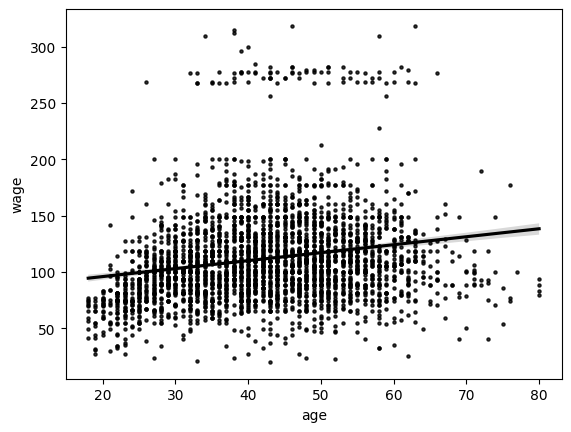

In [35]:
sns.regplot(
    x="age",
    y="wage",
    data=df,
    scatter_kws={"s": 5, "color": "black"},
    line_kws={"color": "black"},
)

##### Shapiro-Wilk test for normality

Age: W = 0.9910561787924322, p-value = 9.416337654404108e-13
Wage: W = 0.8795743517164918, p-value = 2.463070103676827e-43


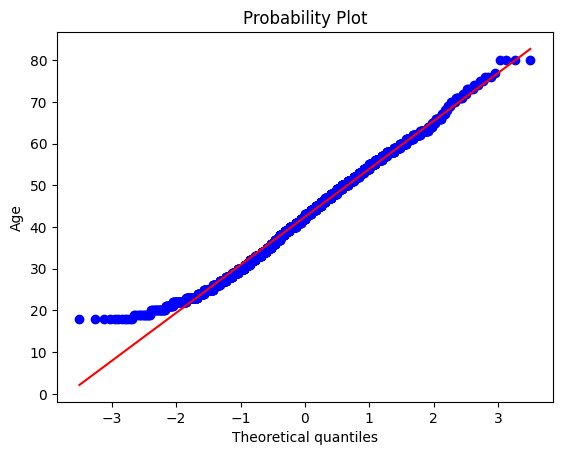

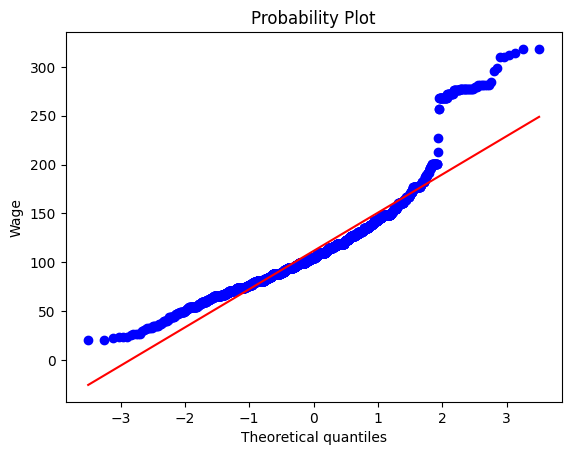

In [36]:
stat, p_value = stats.shapiro(df["age"])
print(f"Age: W = {stat}, p-value = {p_value}")

stat, p_value = stats.shapiro(df["wage"])
print(f"Wage: W = {stat}, p-value = {p_value}")

stats.probplot(df["age"], dist="norm", plot=plt)
plt.ylabel("Age")
plt.show()

stats.probplot(df["wage"], dist="norm", plot=plt)
plt.ylabel("Wage")
plt.show()

##### Pearsom correlation test

In [37]:
corre_coef, p_value = stats.pearsonr(df["age"], df["wage"])
print(f"Correlatio Coeficient: {corre_coef}")
print(f"p-value: {p_value}")

Correlatio Coeficient: 0.19563720156358858
p-value: 2.900777675211075e-27


##### Interpretation of results
The Shapiro-Wilk test results indicate that both 'age' and 'wage' deviate from a normal distrubution, according to the p-values being less than the significance level of 0.05. This is also supported by the qq-plots, which show deviations from the reference line, especially in the tails of the distributions.

The Pearson correlation test results show a correlation coefficient of approx 0.2 between 'age' and 'wage', with a p-value less than 0.05. This hints to a weak positive linear relation between the two variables, which is statistically significant.

#### Non-numerical

In [38]:
df_names = df.columns.tolist()

for feature in df_names:
    if feature in numerical_data:
        continue
    print(feature + ":", df[feature].unique().tolist())

maritl: ['1. Never Married', '2. Married', '4. Divorced', '3. Widowed', '5. Separated']
race: ['1. White', '3. Asian', '4. Other', '2. Black']
education: ['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad', '5. Advanced Degree']
region: ['2. Middle Atlantic']
jobclass: ['1. Industrial', '2. Information']
health: ['1. <=Good', '2. >=Very Good']
health_ins: ['2. No', '1. Yes']


##### Box plot

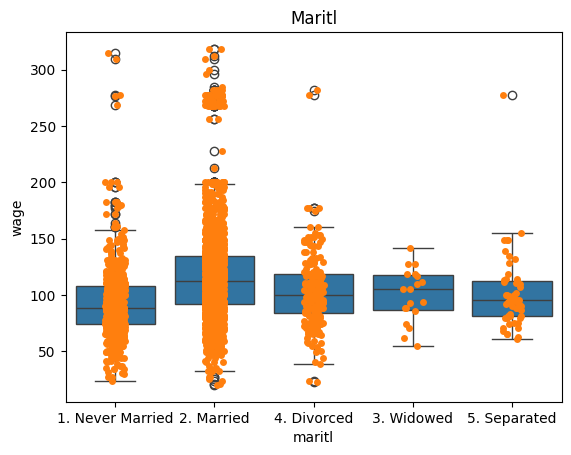

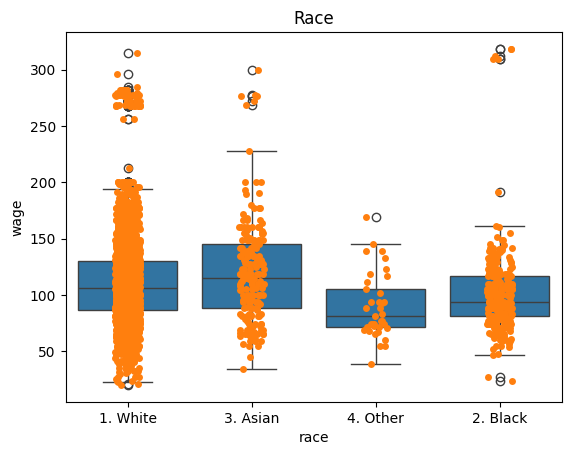

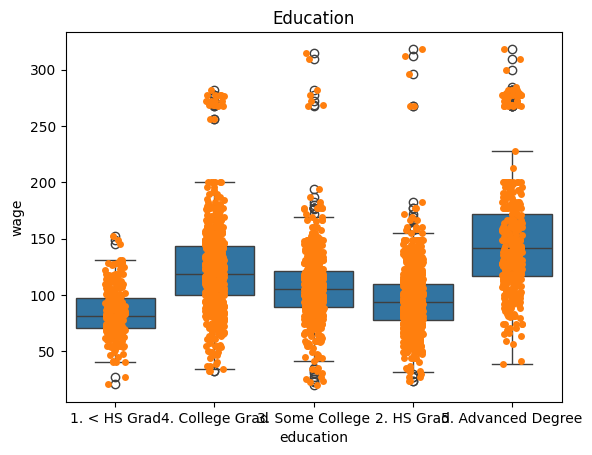

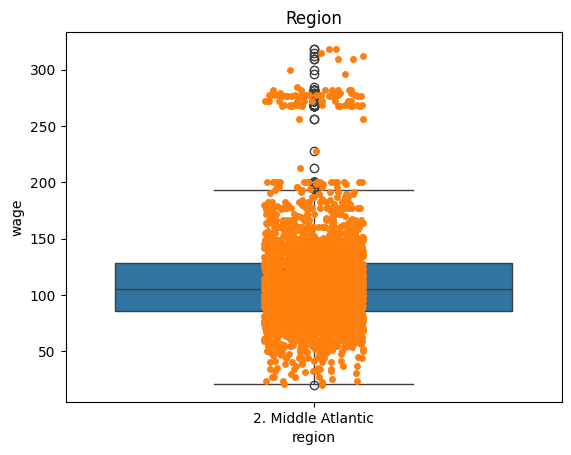

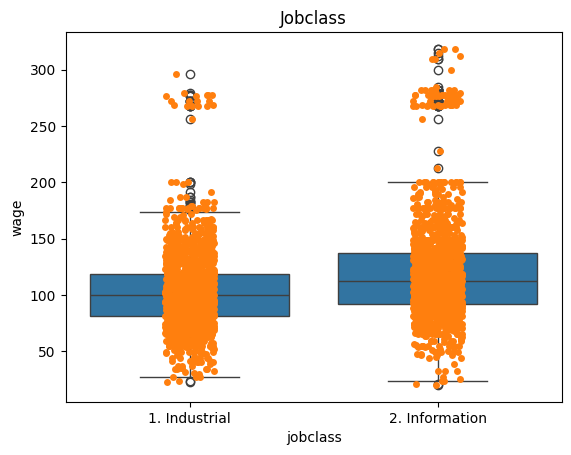

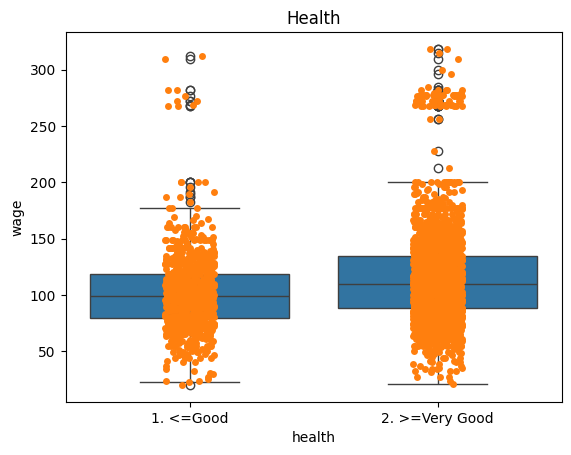

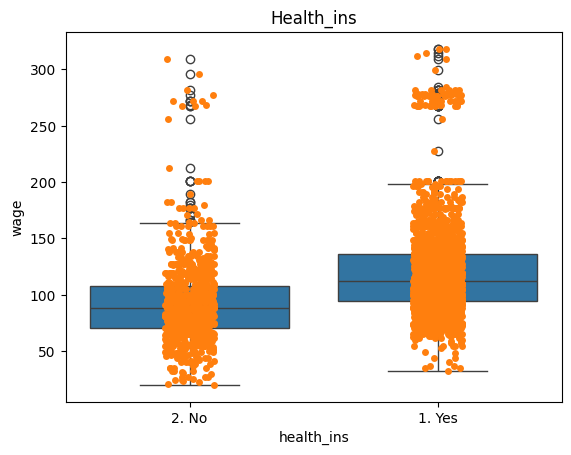

In [39]:
for feature in df_names:
    if feature in numerical_data:
        continue

    sns.boxplot(x=feature, y="wage", data=df)
    sns.stripplot(x=feature, y="wage", data=df)
    plt.title(feature.capitalize())
    plt.show()

##### ANOVA test

In [40]:
for feature in df_names:
    if feature in numerical_data + ["region"]:
        continue

    groups = []
    for idx, group in df.groupby(feature):
        groups.append(group["wage"].values)

    f_stat, p_value = stats.f_oneway(*groups)
    print(feature + ":", f_stat, p_value)

maritl: 55.959584639061326 1.4012011241635891e-45
race: 12.236674234711579 5.8902302921999026e-08
education: 229.80592053052385 2.915931889606186e-172
jobclass: 134.07258457516087 2.308186111678501e-30
health: 71.22664064394343 4.886404483201476e-17
health_ins: 314.9079639235259 4.4657831608311803e-67


##### Interpretation of results
The ANOVA test results show a p-value less than the significance level of 0.05, indicating a significant correlation between 'wage' and the compared metrics.

**Marital status**: Married individuals are indicated to have a higher wage compared to single individuals.

**Race**: Individuals of Asian decent are indicated to have a higher wage then the other evaluated races.

**Education level**: Individuals with higher education levels are indicated to have a higher wage compared to those with lower education levels.

**Region**: Single region evaluated, no comparison possible.

**Job class**: Information class have higher wage compared to the Industrial class.

**Health**: Individuals in good health are indicated to have a higher wage compared to those in poor health.

**Health insurance**: Individuals with health insurance are indicated to have a higher wage compared to those without insurance.